In [1]:
from fastai.text import *

In [2]:
path = untar_data(URLs.IMDB_SAMPLE)

In [3]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [4]:
df.text[1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

In [5]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

In [6]:
data = TextClasDataBunch.from_csv(path, 'texts.csv')
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj tivo for weeks before i watched it . i dreaded a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj xxunk . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos i really wanted to love this show . i truly , honestly did . \n \n xxmaj for the first time , gay viewers get their own version of the "" xxmaj the xxmaj bachelor "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance",negative
"xxbos \n \n i 'm sure things did n't exactly go the same way in the real life of xxmaj homer xxmaj hickam as they did in the film adaptation of his book , xxmaj rocket xxmaj boys , but the movie "" xxmaj october xxmaj sky "" ( an xxunk of the book 's title ) is good enough to stand alone . i have not read xxmaj",positive


In [7]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the',
 ',']

In [8]:
data.train_ds[0][0]

Text xxbos xxmaj paul xxmaj greengrass definitely saved the best xxmaj bourne for last ! i 've heard a lot of people complain about they way he filmed this movie , and some have even compared the camera style to the xxmaj blair xxmaj witch xxmaj project . xxmaj all i have to say to that is ... are you kidding me ? xxmaj come on it was not that bad at all . i think it helps the action scenes to feel more realistic , which i would prefer over highly stylized stunt choreography . xxmaj as for the rest of the movie i really did n't even notice it . 
 
  xxmaj you can tell that xxmaj damon has really gotten comfortable with the role of xxmaj jason xxmaj bourne . xxmaj sometimes that can be a bad thing , but in this case its a really good thing . xxmaj he really becomes xxmaj jason xxmaj bourne in this installment . xxmaj damon also has a great supporting cast in xxmaj joan xxmaj allen , xxmaj xxunk xxmaj kramer , and xxmaj julia xxmaj stiles . xxmaj david xxmaj xxunk was a great addition to

In [9]:
data.train_ds[0][0].data

array([   2,    4,  691,    4, ..., 3791, 1986, 1124,   49])

In [10]:
del data, data_lm

# Full IMDB

In [11]:
bs = 48

In [12]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/home/jupyter/.fastai/data/imdb/test'),
 PosixPath('/home/jupyter/.fastai/data/imdb/tmp_clas'),
 PosixPath('/home/jupyter/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/home/jupyter/.fastai/data/imdb/README'),
 PosixPath('/home/jupyter/.fastai/data/imdb/unsup'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train'),
 PosixPath('/home/jupyter/.fastai/data/imdb/tmp_lm')]

In [13]:
(path/'train').ls()

[PosixPath('/home/jupyter/.fastai/data/imdb/train/pos'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/neg'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/labeledBow.feat')]

In [14]:
data_lm = (TextList.from_folder(path)
           .filter_by_folder(include=['train', 'test', 'unsup'])
           .split_by_rand_pct(0.1)
           .label_for_lm()
           .databunch(bs=bs))
data_lm.save('data_lm.pkl')

In [15]:
data_lm.show_batch()

idx,text
0,". xxmaj and to make things worse , they have n't got any customers ( as their former boss predicted ) . xxmaj when the man pays them a visit in their shop , he challenges them to provide the meat for a dinner party he organizes . \n \n xxmaj than a tragic accident happens . xxmaj one of the butchers locks the electrician into the freezing chamber"
1,on the hotel stairway both xxmaj billy xxmaj score and xxmaj sharky 's machine member xxmaj arch come face to face with xxmaj billy 's drug induced invincibility clashing with xxmaj arch 's xxmaj zen reality alerting philosophy in what can best be said to be a battle of two cultures : xxmaj west and xxmaj east . xxbos xxmaj this wonderful film has never failed to move me .
2,"'s life , aspiring politician xxmaj captain xxmaj hugh xxmaj xxunk ( xxmaj peter xxmaj egan ) . xxmaj he is ambitious , handsome , but also very young . xxmaj tellingly , his girlfriend , xxmaj connie ( xxmaj caroline xxmaj mortimer ) , mothers him , combing his hair and making sure he has a clean handkerchief before he goes out . xxmaj he is known to both"
3,"year , and certainly one of the most truthful . xxbos xxmaj due to this show getting cut early i never realized why until i recently read the story behind the series . i felt this show never got its dues as one of the greatest shows , this show is iconic in nature and deserves the movie it was always intended to have if not with the original a"
4,"howard xxmaj shore 's music and xxmaj ronald xxmaj sanders 's editing ( a team that wins ) . xxmaj for everyone born in the early 80 's with a super xxunk , a genesis or an arcade stick in the hands , this movie rings a bell . xxmaj enough with the nods . xxmaj the plot ? "" xxmaj jennifer xxmaj jason xxmaj leigh stars as a game"


In [16]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

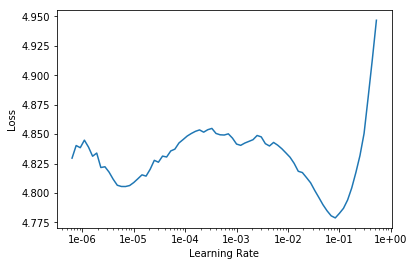

In [18]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [ ]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
learn.save('fit-head')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, , moms=(0.8, 0.7))

In [ ]:
learn.save('fine_tuned')

In [ ]:
print('\n'.join([learn.predict("I liked this movie since", 40, 0.75) for _ in range(2)]))

In [ ]:
learn.save_encoder('fine_tuned_enc')

# Classifer

In [ ]:
data_clas = (TextList.from_folder(path, vocab=data_lm.vocab)
             .split_by_folder(valid='test')
             .label_from_folder(classes=['neg', 'pos'])
             .databunch(bs=bs))
data_clas.save('data_clas.pkl')

In [ ]:
data_clas.show_batch()

In [ ]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1, , moms=(0.8, 0.7))

In [ ]:
learn.save('first')

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(), moms=(0.8, 0.7))

In [ ]:
learn.save('second')

In [ ]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(), moms-(0.8, 0.7))

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(), moms-(0.8, 0.7))